In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: better styling
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("F:\\Customer-Retention-Prediction\\data\\raw_data\\dataset.csv")

In [4]:
df.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False


##### Target_Churn = True (Customer churned (left the company, stopped using the service))
##### Target_Churn = False (Customer retained (stayed with the company))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

##### So there is no null value

In [6]:
df.describe()

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [7]:
df.shape

(1000, 15)

##### So total 1000 rows and 15 column where the last column is target column which indicates customer retention value . True for retention and false for not retention.

In [8]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Total_Spend',
       'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount',
       'Num_of_Returns', 'Num_of_Support_Contacts', 'Satisfaction_Score',
       'Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response',
       'Target_Churn'],
      dtype='object')

In [9]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


### No duplicate rows here

In [10]:
print("Target distribution:", df['Target_Churn'].value_counts())

Target distribution: Target_Churn
True     526
False    474
Name: count, dtype: int64


##### The classes are almost balanced (52.6% vs 47.4%).So there is no need to  apply heavy class balancing techniques like SMOTE [ Synthetic Minority Over-sampling Technique ] or random oversampling  or undersampling

##### Here likely important feature for model training could be : 
###### Age : Age may correlate with purchasing behavior like younger users might churn more often, older ones may be more loyal.
###### Gender : Useful categorical feature. Gender can be an important trait to choose churn or not
###### Annual_Income : Higher income may lead to more spending or less sensitivity to price changes (less likely to churn).
###### Total_Spend : Customers who spend more are often more engaged and less likely to churn.
###### Years_as_Customer : Long-term customers usually have higher loyalty (lower churn probability).
###### Total_Spend : Customers who spend more are often more engaged and less likely to churn.
###### Num_of_Purchases : Frequent buyers are likely more satisfied and engaged
###### Average_Transaction_Amount : Can indicate purchasing power or engagement level
###### Num_of_Returns : High returns may signal dissatisfaction that means increases churn risk.
###### Num_of_Support_Contacts : Frequent contacts might indicate recurring problems or dissatisfaction that is higher churn risk.
###### Satisfaction_Score : This is a value of satisfaction
###### Last_Purchase_Days_Ago : The longer it’s been since their last activity, the more likely they’ve churned.
###### Email_Opt_In : Opted to get promotional email means less likely to churn 
###### Promotion_Response : Customers who respond to promotions show higher engagement (lower churn).

##### Here overall all features has relation to churn or not to churn though finding correlation with target value could be a great impact to choose which feature should be in model treining or which should not be.

### Load processed data
### Gender : Other -2 , Male -1 , Female-0
### Promotional response : Responded - 1 , Ignored - 0 , Unscribed - 2
### In case of other categorical value ,  True : 1 and False : 0 

In [15]:
df_processed= pd.read_csv("F:\\Customer-Retention-Prediction\\data\\Processed_data\\processed_data.csv")
df_processed.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,2,45.15,5892.58,5,22,453.80,2,0,3,129,1,1,1
1,2,65,1,79.51,9025.47,13,77,22.90,2,2,3,227,0,1,0
2,3,18,1,29.19,618.83,13,71,50.53,5,2,2,283,0,1,1
3,4,21,2,79.63,9110.30,3,33,411.83,5,3,5,226,1,0,1
4,5,21,2,77.66,5390.88,15,43,101.19,3,0,5,242,0,2,0


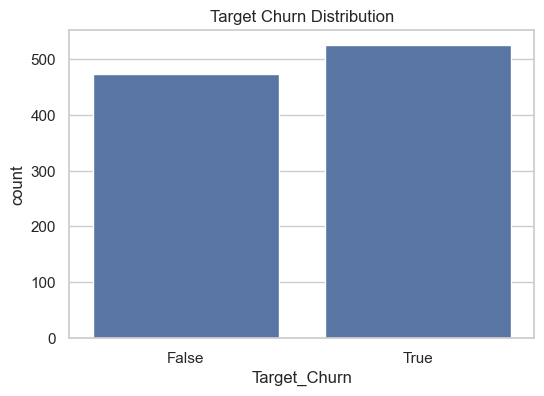

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Target_Churn', data=df)
plt.title("Target Churn Distribution")
plt.show()

##### Here almost same number so no imbalance between 2 type target

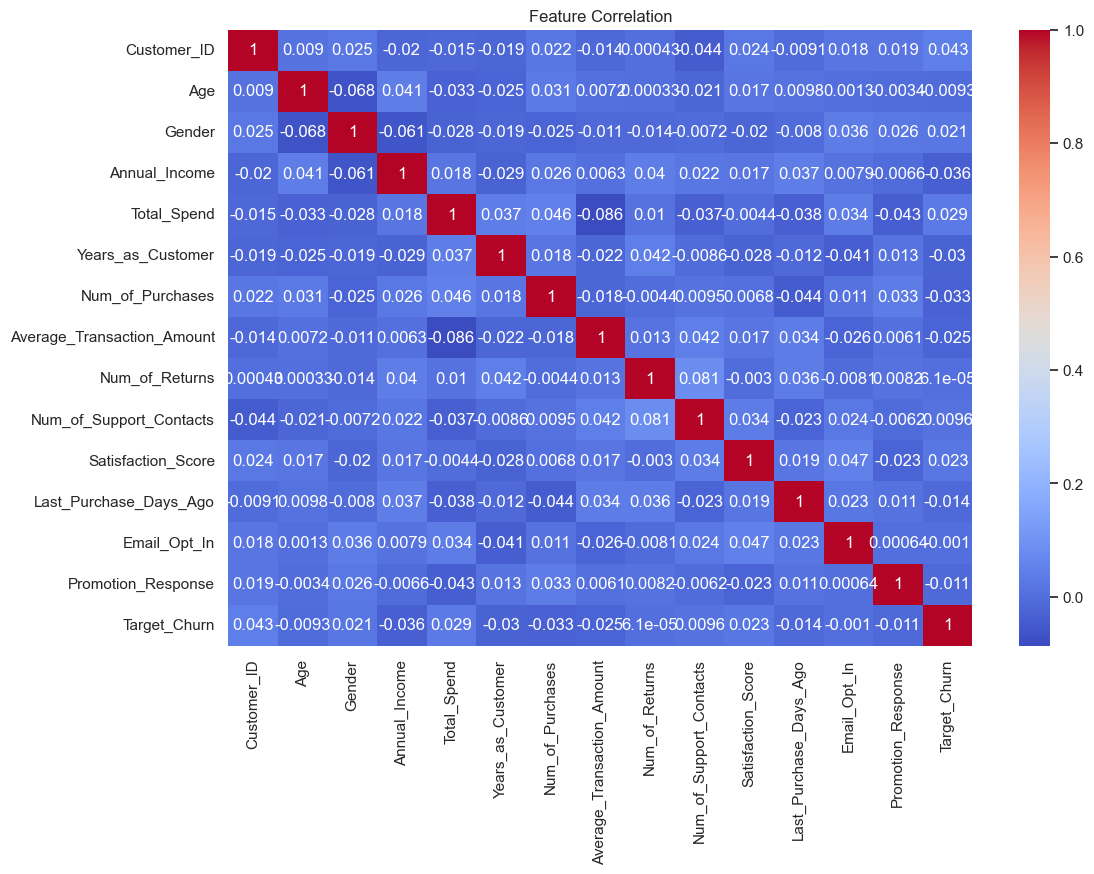

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df_processed.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


##### Here , Num of returns has the samllest correlation value and it is positively correlated. As the value is the samllest it is ignored in case of model training.

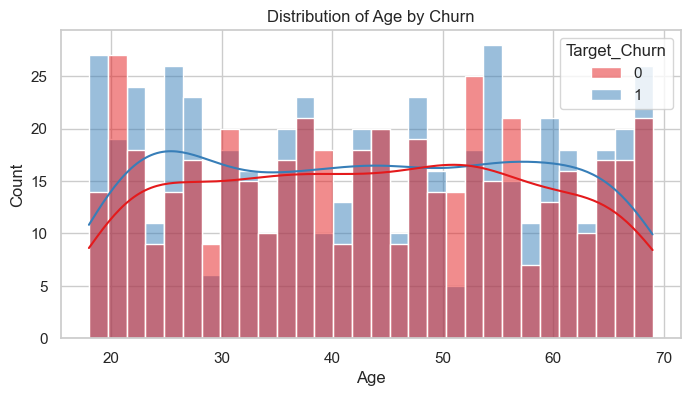

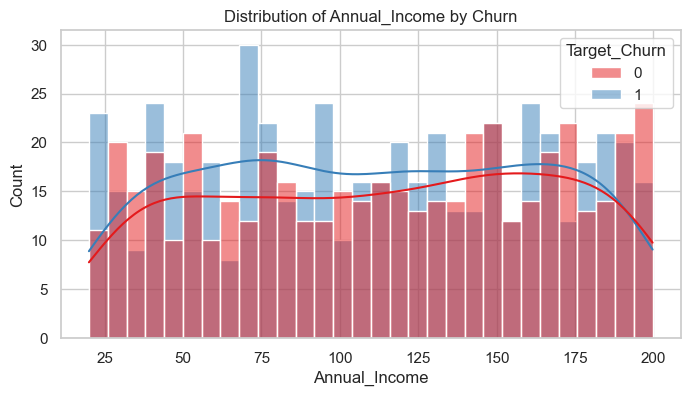

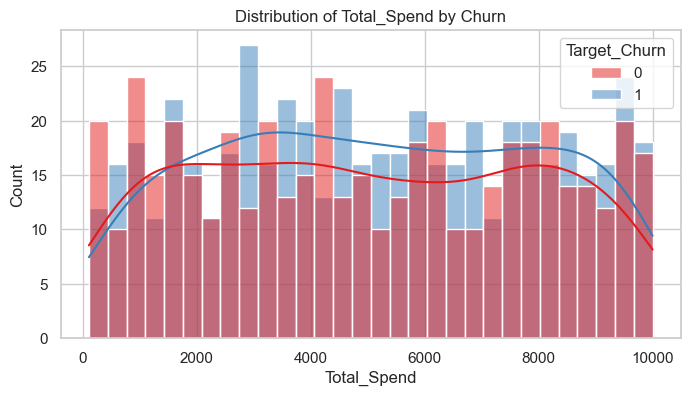

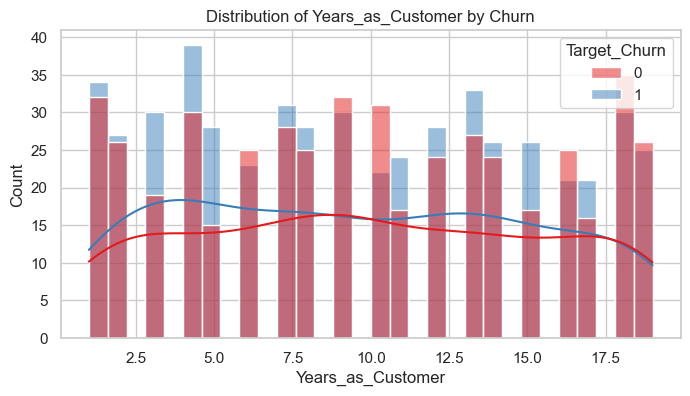

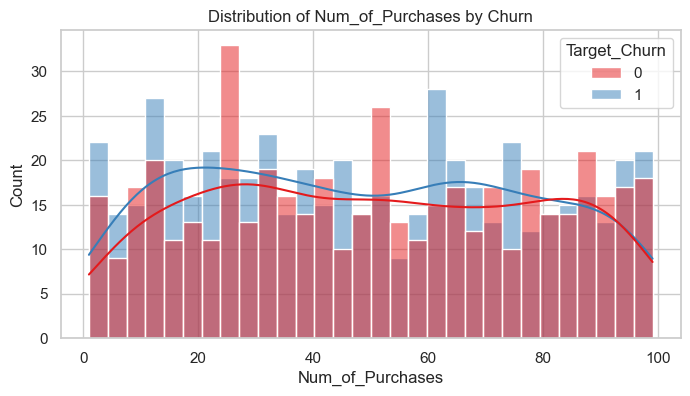

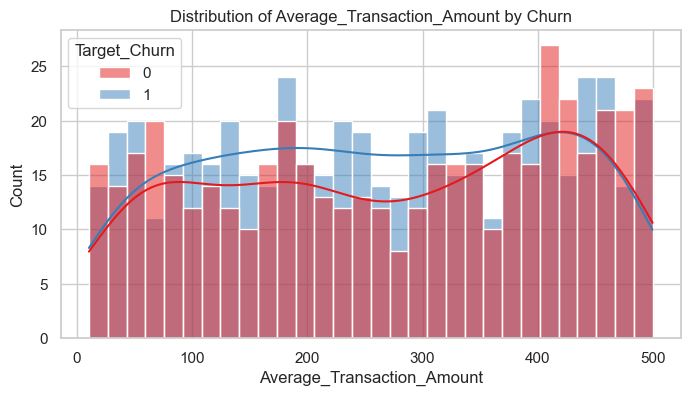

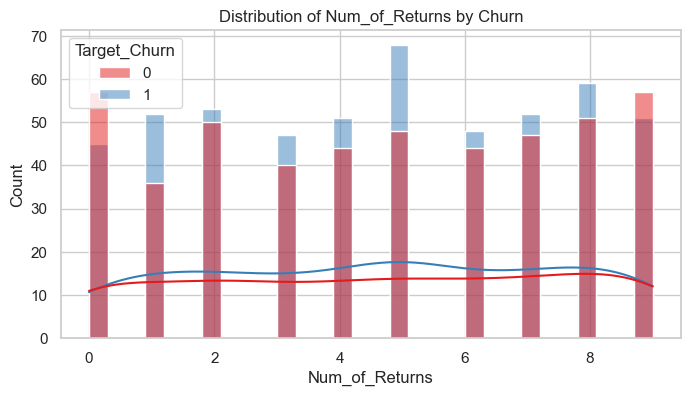

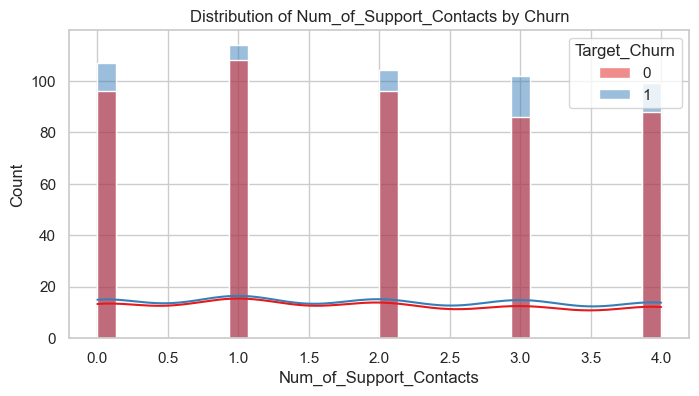

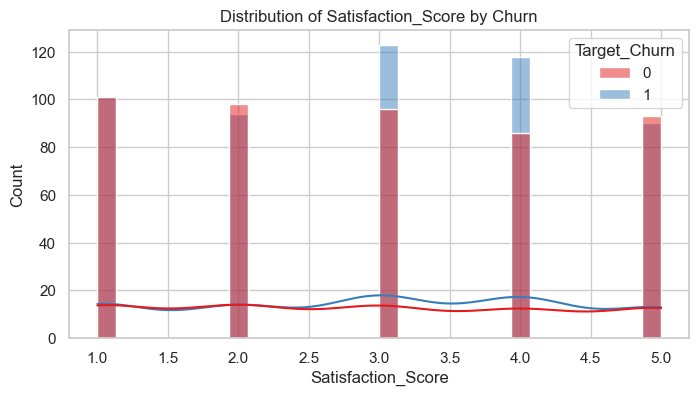

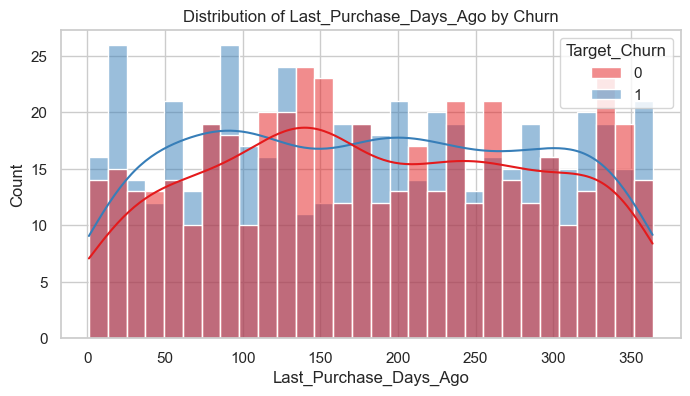

In [39]:
needed_features = [col for col in df_processed.columns if col not in ['Customer_ID', 'Target_Churn','Gender', 'Email_Opt_In', 'Promotion_Response']]
for feature in needed_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df_processed, x=feature, hue='Target_Churn', kde=True, bins=30, palette='Set1')
    plt.title(f"Distribution of {feature} by Churn")
    plt.show()


#### ```For each feature which is numeric, the distributions are given above. From here , distribution of average transaction amount and distribution of number of purchases by churn are left and right skewed. Moreover other feature does not follow any specific distribution. Moreover as a whole the number of customer churned is higher than the number of customer retained for each feature it reflects that the company is not good enough to attract it's customer```

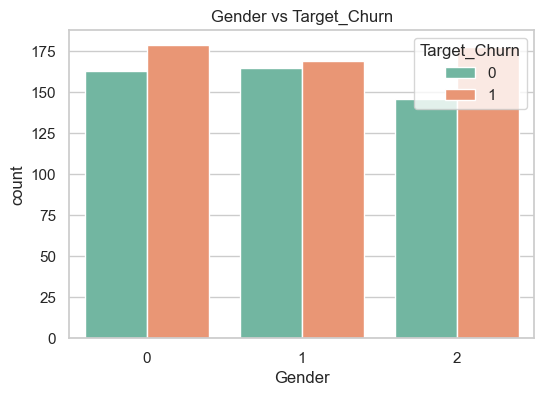

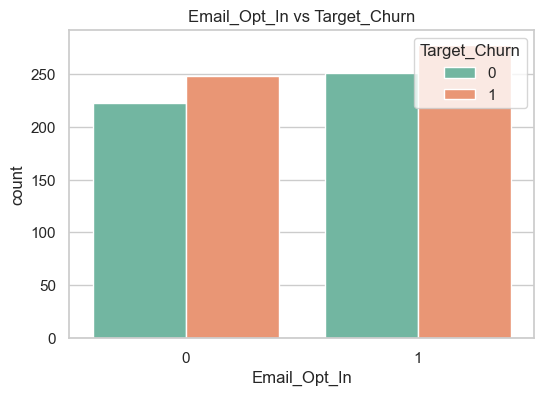

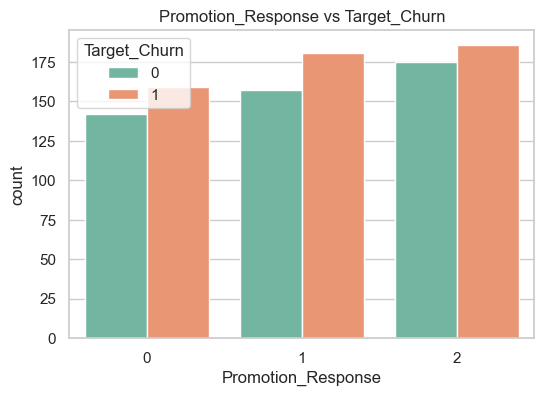

In [24]:
categorical_features = ['Gender', 'Email_Opt_In', 'Promotion_Response']

for cat in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=cat, hue='Target_Churn', data=df_processed, palette='Set2')
    plt.title(f"{cat} vs Target_Churn")
    plt.show()


##### ```The other type gender has top most target churn = true behavior and same for female also where in case of men it is less than other 2 ```

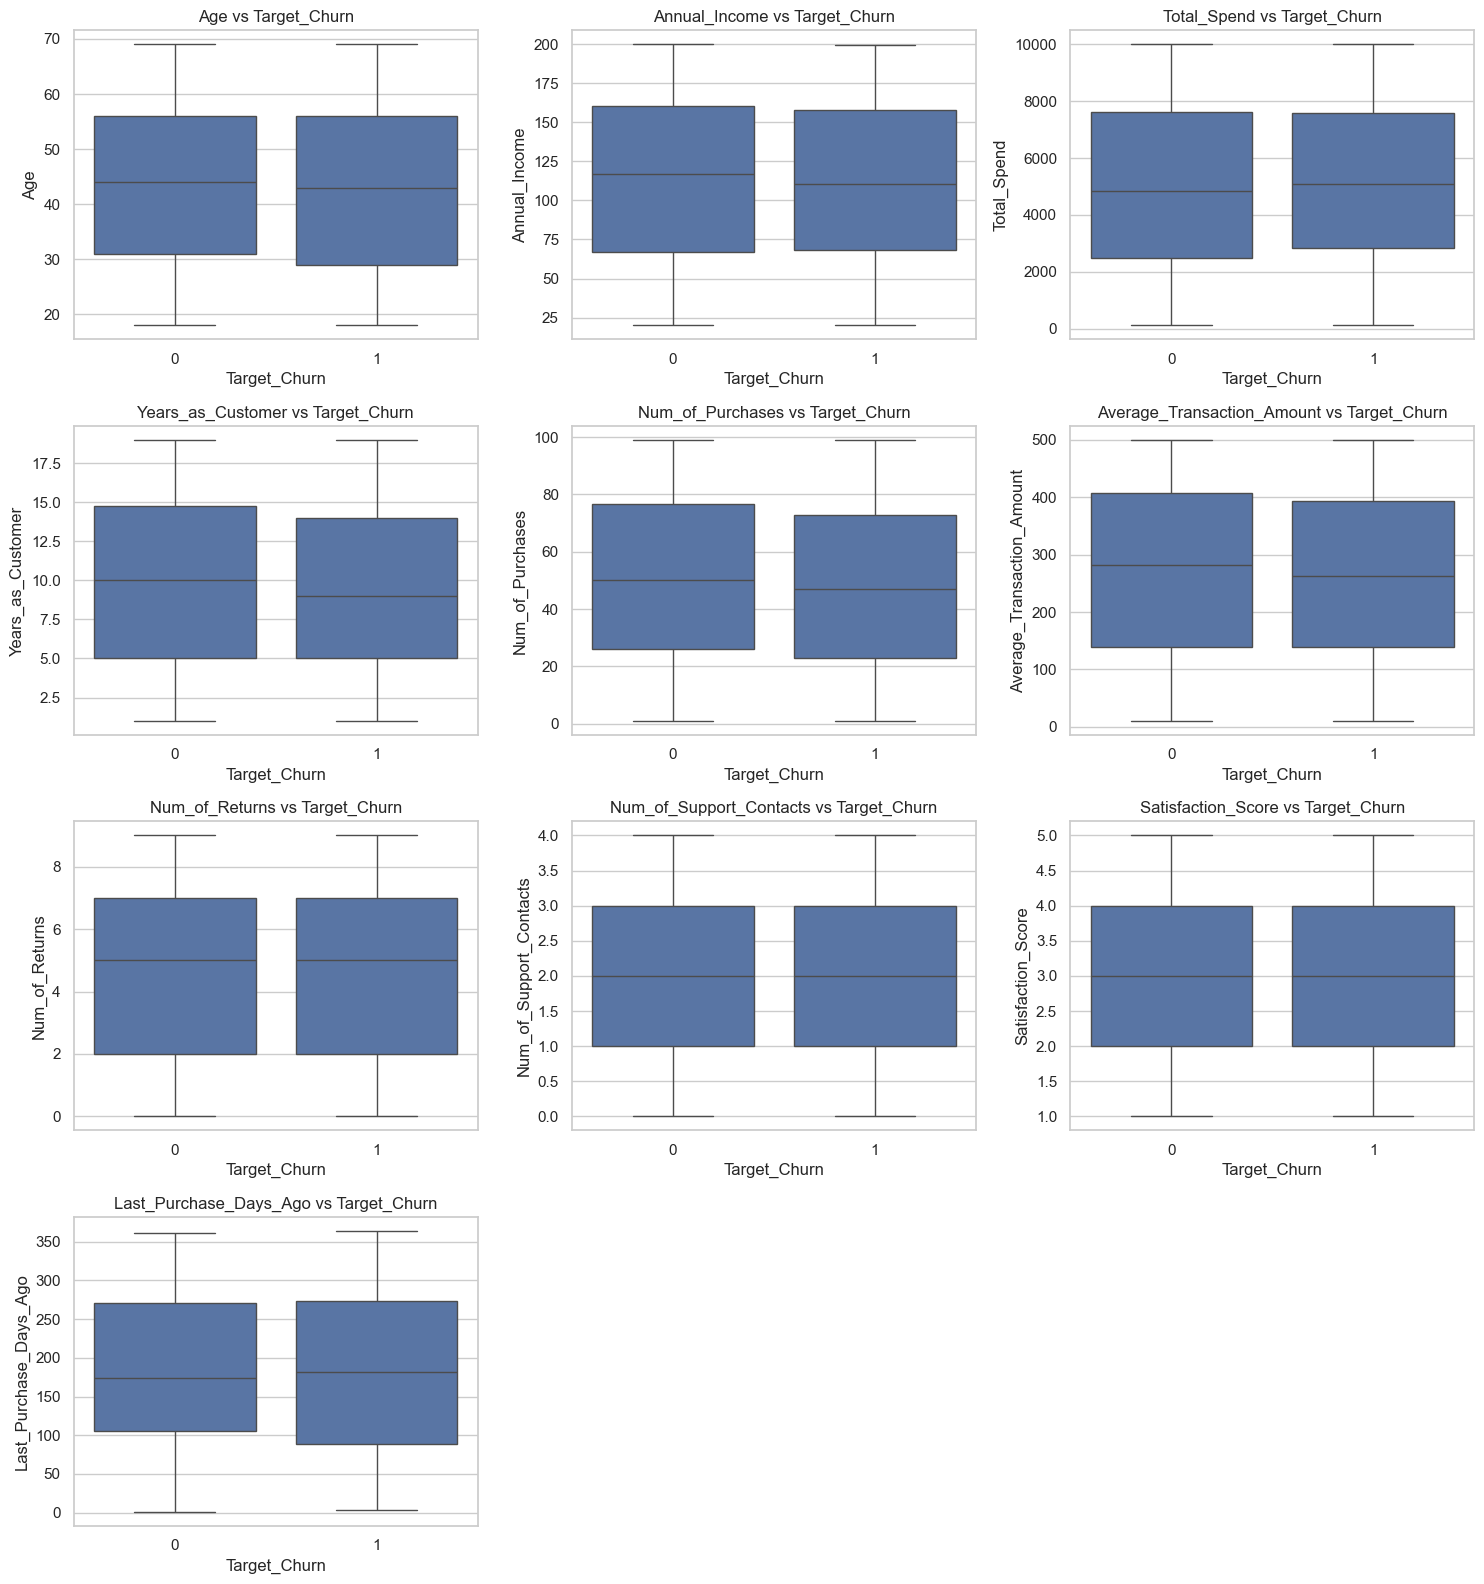

In [ ]:
# Exclude ID column 
# and also categorical features as they are not suitable for box plots
features = [col for col in df_processed.columns if col != 'Customer_ID' and col != 'Target_Churn' and col not in categorical_features]

# Set up the figure
n_features = len(features)
n_cols = 3  # number of subplots per row
n_rows = (n_features + n_cols - 1) // n_cols  # calculate rows needed

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='Target_Churn', y=feature, data=df_processed)
    plt.title(f"{feature} vs Target_Churn")

plt.tight_layout()
plt.show()

```
1.5 is a standard multiplier used in statistics.

It defines how far a value has to be from the middle 50% of the data to be considered an outlier.

It can be adjusted depending on how strict measurement is needed:

Multiplier	             Effect
1.5	             Standard, detects mild outliers
3	             Detects extreme outliers only
0.5–1.0	         More sensitive, detects even mild deviations

```

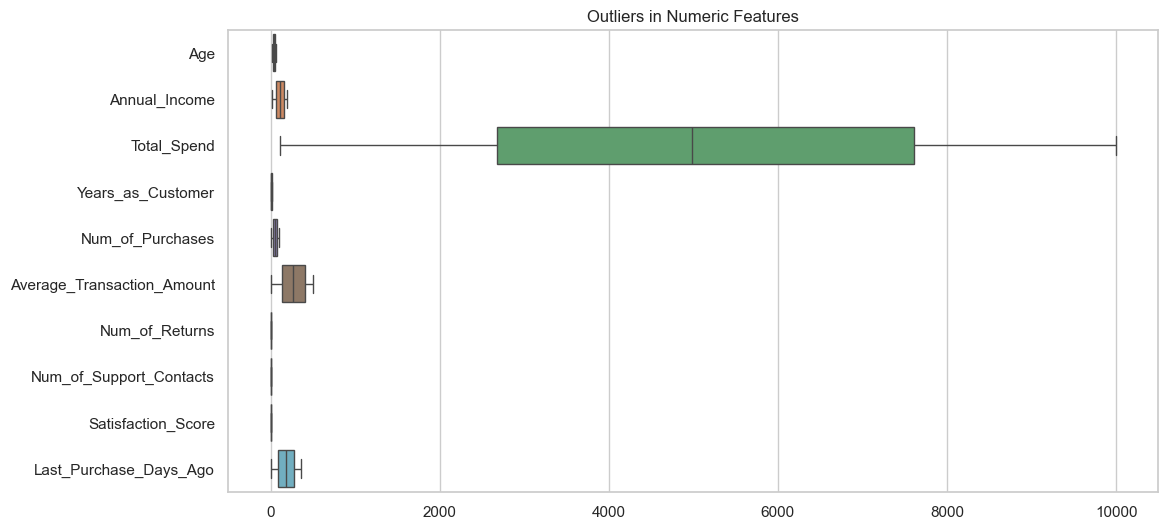

Age: 0 outliers
Annual_Income: 0 outliers
Total_Spend: 0 outliers
Years_as_Customer: 0 outliers
Num_of_Purchases: 0 outliers
Average_Transaction_Amount: 0 outliers
Num_of_Returns: 0 outliers
Num_of_Support_Contacts: 0 outliers
Satisfaction_Score: 0 outliers
Last_Purchase_Days_Ago: 0 outliers

Outliers in Total_Spend:
 Empty DataFrame
Columns: [Customer_ID, Age, Gender, Annual_Income, Total_Spend, Years_as_Customer, Num_of_Purchases, Average_Transaction_Amount, Num_of_Returns, Num_of_Support_Contacts, Satisfaction_Score, Last_Purchase_Days_Ago, Email_Opt_In, Promotion_Response, Target_Churn]
Index: []


In [32]:
# Select numeric features for outlier detection
numeric_features = [
    col for col in df_processed.columns if col not in ['Customer_ID', 'Target_Churn','Gender', 'Email_Opt_In', 'Promotion_Response']
    ]

#  Boxplot to visualize outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df_processed[numeric_features], orient='h')
plt.title("Outliers in Numeric Features")
plt.show()

# Programmatic IQR-based outlier detection
outliers = {}

for col in numeric_features:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Store outlier rows for this column
    outliers[col] = df_processed[(df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)]
    
    # Optional: print number of outliers per column
    print(f"{col}: {outliers[col].shape[0]} outliers")

# Example: show actual outlier rows for 'Total_Spend'
print("\nOutliers in Total_Spend:\n", outliers['Total_Spend'])

##### So , the dataste has no outliers

EDA with engineered feature dataset

In [34]:
df_processed_engineered= pd.read_csv("F:\\Customer-Retention-Prediction\\data\\Processed_data\\processed_data_with_engineered_features1.csv")    

In [35]:
df_processed_engineered.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn,avg_spend_per_year
0,1,62,2,45.15,5892.58,5,22,453.80,2,0,3,129,1,1,1,982.096667
1,2,65,1,79.51,9025.47,13,77,22.90,2,2,3,227,0,1,0,644.676429
2,3,18,1,29.19,618.83,13,71,50.53,5,2,2,283,0,1,1,44.202143
3,4,21,2,79.63,9110.30,3,33,411.83,5,3,5,226,1,0,1,2277.575000
4,5,21,2,77.66,5390.88,15,43,101.19,3,0,5,242,0,2,0,336.930000


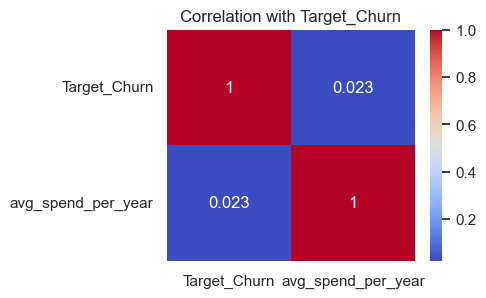

In [38]:
# Select only the target and the new engineered feature(s)
cols_to_plot = ['Target_Churn', 'avg_spend_per_year']

plt.figure(figsize=(4,3))
sns.heatmap(df_processed_engineered[cols_to_plot].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation with Target_Churn")
plt.show()

##### For engineered feature the score is same as satisfaction_score 

##### ```So necessary feature to build model are :  'Age', 'Gender', 'Annual_Income', 'Total_Spend','Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount','Num_of_Support_Contacts', 'Satisfaction_Score','Last_Purchase_Days_Ago', 'Email_Opt_In', 'Promotion_Response'```

##### ```'Number of returns' has very low correlation with target so it is not needed.```
##### ```'With Engineered and with out engineered feature what can be the score that can be seen later'```